# Modulation of signals

In [94]:
import numpy as np
import matplotlib.pyplot as plt
import math


In [95]:
f = 4 # Signal
fc = 200 # Carrier
# sampling rate
N = 5000
# sampling interval
ts = 1.0/N
stop_time = 10
t = np.arange(0,1,ts)


sin_list = np.array([math.sin(2*math.pi*f*n) for n in range(N)])
#sin_list_np = np.array(sin_list)
def get_sine(f,A=1,phase=0,N=1000):
    sin_wave = A*np.sin(2*np.pi*f*t + phase*np.array([1]*len(t)))
    return sin_wave

In [103]:
s1 = get_sine(f,phase=0,N=N)
s2 = get_sine(fc,phase=np.pi/2,N=N) # Carrier

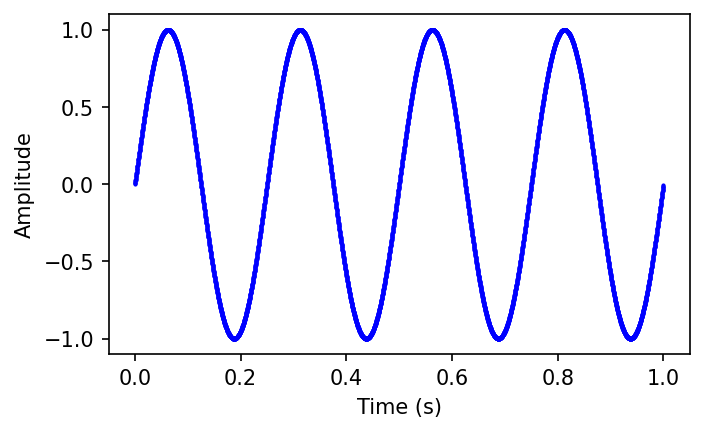

In [104]:

fig=plt.figure(figsize=(5,3), dpi= 150, facecolor='w', edgecolor='k')
ax = plt.axes()
num_p = N
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
# ax.plot(t[0:num_p],s3[0:num_p],c="r")
ax.scatter(t[0:num_p],s1[0:num_p],c="b", s =1)

In [ ]:
# Get MODULATION GOING!
s3 = s1 * s2

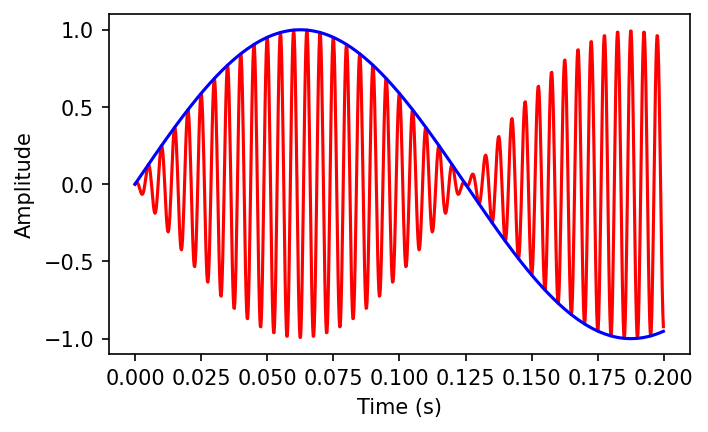

In [105]:

fig=plt.figure(figsize=(5,3), dpi= 150, facecolor='w', edgecolor='k')
ax = plt.axes()
num_p = 1000
#ax.scatter(t[0:num_p],get_sine(f)[0:num_p],s=2)
# ax.scatter(t,get_sine(f),s=1)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
ax.plot(t[0:num_p],s3[0:num_p],c="r")
ax.plot(t[0:num_p],s1[0:num_p],c="b")

In [106]:
# FFT guide in python: https://pythonnumericalmethods.berkeley.edu/notebooks/chapter24.04-FFT-in-Python.html
from numpy.fft import fft, ifft

fft_s1 = fft(s1)
fft_s2 = fft(s2)
fft_s3 = fft(s3)

fft_N = len(fft_s1)
n = np.arange(fft_N)
T = fft_N/N
freq = n/T

####

N_fft = len(fft_s1)
n = np.arange(N_fft)
T = N_fft/N
freq = n/T 

In [107]:
len(fft_s1)

5000

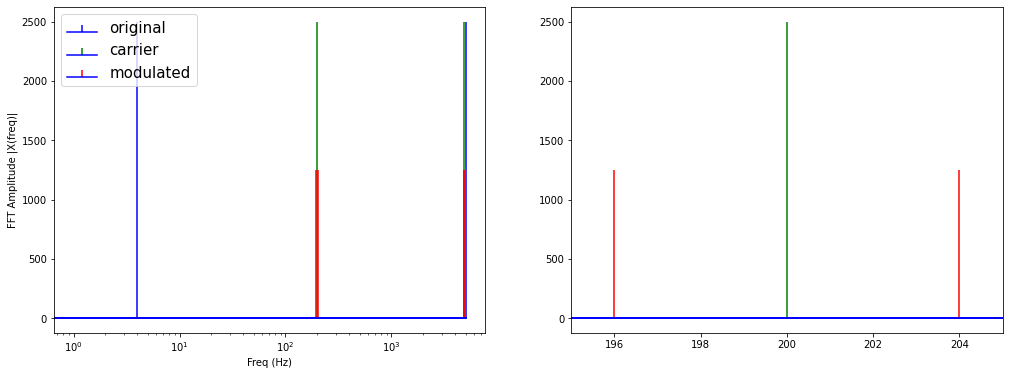

In [109]:
plt.figure(figsize = (17, 6))
plt.subplot(121)

plt.stem(freq, np.abs(fft_s1), 'b', markerfmt=" ", basefmt="-b",label="original")
plt.stem(freq, np.abs(fft_s2), 'g', markerfmt=" ", basefmt="-b",label="carrier")
plt.stem(freq, np.abs(fft_s3), 'r', markerfmt=" ", basefmt="-b", label="modulated")
plt.legend(loc=2, prop={'size': 15})
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')

plt.xscale("log")
plt.subplot(122)
# plt.plot(t, ifft(X), 'r')
# plt.xlabel('Time (s)')
# plt.ylabel('Amplitude')
# plt.tight_layout()
plt.xlim(195, 205)
plt.stem(freq, np.abs(fft_s1), 'b', markerfmt=" ", basefmt="-b",label="original")
plt.stem(freq, np.abs(fft_s2), 'g', markerfmt=" ", basefmt="-b",label="carrier")
plt.stem(freq, np.abs(fft_s3), 'r', markerfmt=" ", basefmt="-b", label="modulated")


plt.show()

## Demodulation

In [111]:
s_d = s3 * s2

fft_s_d = fft(s_d)

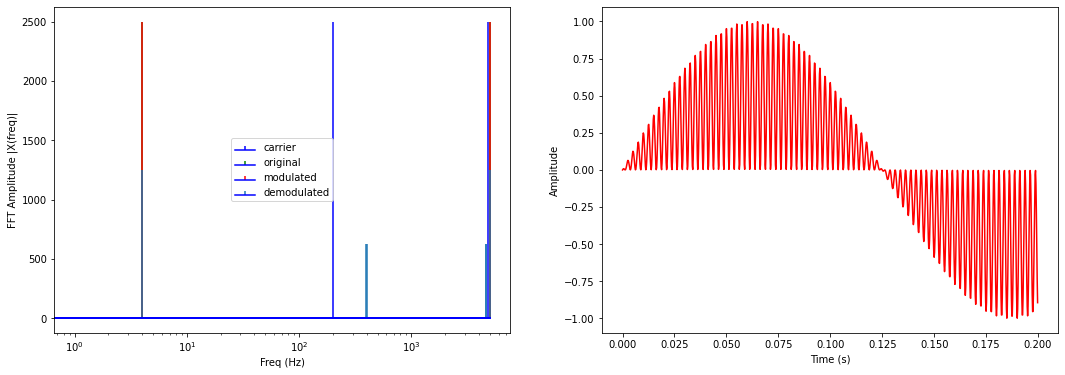

In [113]:
plt.figure(figsize = (18, 6))
plt.subplot(121)

plt.stem(freq, np.abs(fft_s2), 'b', markerfmt=" ", basefmt="-b",label="carrier")
plt.stem(freq, np.abs(fft_s1), 'g', markerfmt=" ", basefmt="-b",label="original")
plt.stem(freq, np.abs(fft_s1), 'r', markerfmt=" ", basefmt="-b",label="modulated")
plt.stem(freq, np.abs(fft_s_d), 'p', markerfmt=" ", basefmt="-b",label="demodulated")
plt.legend()
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')
# plt.xlim(95, 105)
plt.xscale("log")
plt.subplot(122)
# plt.plot(t, ifft(X), 'r')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
# plt.plot(t,s3,c="b")
plt.plot(t[0:1000],s_d[0:1000],c="r")
# plt.tight_layout()
plt.show()

## Low pass

## 2. Low-pass filter transfer function
[Source](https://www.youtube.com/watch?v=HJ-C4Incgpw&ab_channel=CurioRes)
* A cutoff frequency is selected and the transfer function for the low-pass filter is computed using <code>signal.TransferFunction</code>
* The low-pass filter transfer function is
$$H(s) = \frac{\omega_0}{s + \omega_0}$$
* The Bode plot shows the frequency response of $H$ by plotting the magnitude and phase of the frequency response
* Low frequencies are not attenuated (this is the *pass band*)
* High frequencies are attenutated (this is the *stop band*)

In [114]:
from scipy import signal

# Initiate filter
cutoff = 2 * np.pi * (f*2)

num = [cutoff]
denum = [1,cutoff]
low_pass = signal.TransferFunction(num,denum)

# Plotting the filter


signalFreq = [2,1e3]; # Cycles / second
signalMag = [1,0.2]; # magnitude of each sine
# Generate the bode plot
w = np.logspace( np.log10(min(signalFreq)*2*np.pi/10), np.log10(max(signalFreq)*2*np.pi*10), 500 )
w, mag, phase = signal.bode(low_pass,w)


dt = 1.0/N;
discreteLowPass = low_pass.to_discrete(dt,method='gbt',alpha=0.5)
print(discreteLowPass)

TransferFunctionDiscrete(
array([0.00500141, 0.00500141]),
array([ 1.        , -0.98999718]),
dt: 0.0002
)


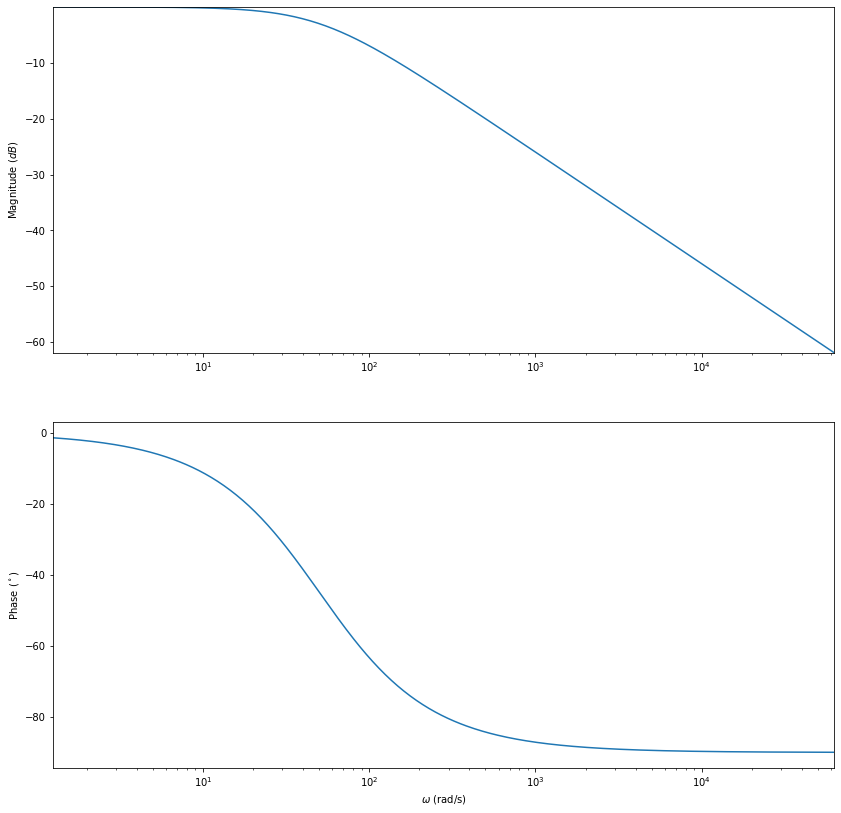

In [115]:
# Magnitude plot
# plt.figure()
plt.figure(figsize = (14, 14))
# fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
# plt.subplots(2, 1, sharex=True)
plt.subplot(211)
plt.semilogx(w, mag)
# for sf in signalFreq:
#     plt.semilogx([sf*2*np.pi,sf*2*np.pi],[min(mag),max(mag)],'k:')
plt.ylabel("Magnitude ($dB$)")
plt.xlim([min(w),max(w)])
plt.ylim([min(mag),max(mag)])

# Phase plot
# plt.figure()
plt.subplot(212)
plt.semilogx(w, phase)  # Bode phase plot
plt.ylabel("Phase ($^\circ$)")
plt.xlabel("$\omega$ (rad/s)")
plt.xlim([min(w),max(w)])
plt.show()


In [116]:
tout, resp, x = signal.lsim(low_pass, s_d, t)

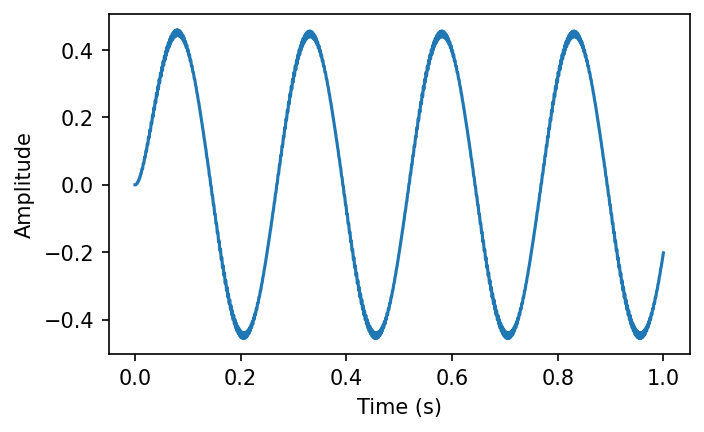

In [117]:

fig=plt.figure(figsize=(5,3), dpi= 150, facecolor='w', edgecolor='k')
ax = plt.axes()
num_p = 1000
#ax.scatter(t[0:num_p],get_sine(f)[0:num_p],s=2)
# ax.scatter(t,get_sine(f),s=1)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
# ax.plot(t[0:num_p],s3[0:num_p],c="r")
# ax.plot(t[0:num_p],s1[0:num_p],c="b")
ax.plot(tout, resp)